The Stableswap equation given in the Curve whitepaper is

$$ An^n\sum_i x_i + D = An^n D + \frac{D^{n+1}}{n^n\prod\limits_i x_i}$$

$D$ is the stableswap invariant.

$A$ is the amplification coefficient.

The $x_i$'s are the pool balances for each token.

To solve for $D$ in the stableswap equation, we can use the auxiliary form of the equation

$$ f(D) = 0 $$

where

$$ f(D) = An^n S + D - An^n D - \frac{D^{n+1}}{n^n\prod x_i} $$

Note $f(P) > 0$ and $f(S) < 0$ (this is simple to see using that $P <= S$ with equality only when $x_1 = x_2$).  Since $P < S$ in the generic case, we expect that somewhere in-between, there is a $D$ such that $f(D) = 0$.  In fact, the situation is much better than that.  

The derivative of $f$ is

$$ f'(D) = 1 - An^n - (n+1) \frac{D^n}{n^n\prod x_i} $$

Since $f'$ is always be negative (as long as $A > 1$), $f$ is strictly decreasing and Newton's method will rapidly find a solution.

Newton's method gives the iteration:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

After some cleanup, this gives the iterative formula:

$$ D = \frac{(nD_p + An^nS)D}{(n+1)D_p + (An^n - 1)D} $$

where $D_p = \frac{D^{n+1}}{n^n\prod x_i}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Amplification coefficient
A = 10
# number of token types in pool
n = 2

In [3]:
# token balances
x_1 = 85
x_2 = 15

In [4]:
# "unnormalized" arithmetic mean
S = x_1 + x_2
print("S:", S)

# "unnormalized" geometric mean
P = n * np.sqrt(x_1*x_2)
print("P:", P)

S: 100
P: 71.4142842854285


In [5]:
# iterative calculation for D invariant

D = S
for i in range(256):
    D_p = (D/n)**n / (x_1 * x_2) * D
    D = (A* n**n * S + n * D_p) * D / ((A*n**n - 1) * D + (n+ 1) * D_p)
print("D:", D)

D: 97.85333086827161


For $n=2$, the stableswap equation becomes

$$ 4 A (x_1 + x_2) + D = 4 AD + \frac{D^3}{4x_1x_2} $$

which can be rearranged to

$$ 4Ax_2^2 + (4Ax_1 + D - 4AD)x_2 - \frac{D^3}{4x_1} = 0 $$

Given $x_1$, we can solve for $x_2$ via the quadratic formula (see the function `get_other_token_balance`)

In [6]:
def get_other_token_balance(D, A, x):
    """
    For invariant D and amplification coefficient A,
    given the balance of one token, x, return the
    requisite balance of the other token.
    """
    a = 4*A
    b = 4*A*x_ + D - 4 * A * D
    c = -D**3/(4*x_)
    # x_minus = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    x_plus = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    # print(x_minus, x_plus)
    return x_plus

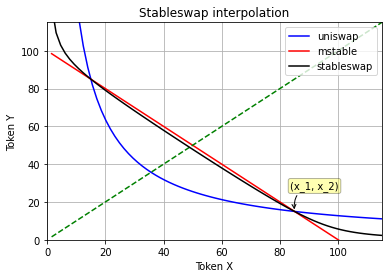

In [7]:
x_end = 115.0
num_steps = 75

fig, ax = plt.subplots()
ax.set_xlim(0, x_end)
ax.set_ylim(0, x_end)

ax.set(xlabel='Token X', ylabel='Token Y',
       title='Stableswap interpolation')
ax.grid()

ax.annotate('(x_1, x_2)', xy=(x_1, x_2), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))

x = np.linspace(0.0, x_end, num_steps)[1:]

y_uni = (P**2/4) / x
ax.plot(x, y_uni, color='b', label='uniswap')

y_mstable = S - x
ax.plot(x, y_mstable, color='r', label='mstable')

ax.plot(x, x, ls='--', color='g')

y_sswap = []
for x_ in x:
    y = get_other_token_balance(D, A, x_)
    y_sswap.append(y)

ax.plot(x, y_sswap, 'black', label='stableswap')


plt.legend(loc='upper right');
# fig.savefig("example.png")
plt.show()